<a href="https://colab.research.google.com/github/RebreaQ/Bert_news/blob/main/diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/h1-ml1/article_metadata.hd5
/kaggle/input/h1-ml1/val_scores.hd5
/kaggle/input/h1-ml1/main_dev_sample.hd5
/kaggle/input/h1-ml1/targets.hd5


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

2021-10-24 05:24:11.752697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Found GPU at: /device:GPU:0


2021-10-24 05:24:15.370556: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-24 05:24:15.373268: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-24 05:24:15.376278: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-24 05:24:15.421350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 05:24:15.422026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla 

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
article_metadata = pd.read_hdf("/kaggle/input/h1-ml1/article_metadata.hd5")
targets = pd.read_hdf("/kaggle/input/h1-ml1/targets.hd5")

In [ ]:
article_metadata

,title,description,source.name,symbols,industries,sectors,time zone,news_id
0,Biden assails Trump for 'bald-faced lies' abou...,Democratic presidential candidate Joe Biden sa...,Reuters,[],[],[],UTC 0,8557db1542d25f5d274fec9e35a8929c
1,NexPoint Strategic Opportunities Fund Declares...,NexPoint Strategic Opportunities Fund (NYSE: N...,PR Newswire,[NHF],[Asset Management],[Financial Services],UTC 0,f1db5f23dfc994334edd5cf8a0965ab5
2,Kayne Anderson MLP/Midstream Investment Compan...,"HOUSTON, Aug. 03, 2020 (GLOBE NEWSWIRE) -- Kay...",GlobeNewswire,[KYN],[Asset Management],[Financial Services],UTC 0,d6ee12389a83b34859591c56286ac3b5
3,Kayne Anderson Midstream/Energy Fund Provides ...,"HOUSTON, Aug. 03, 2020 (GLOBE NEWSWIRE) -- Kay...",GlobeNewswire,[KMF],[],[],UTC 0,dd631c50be0c7b03af18ed63cad9182f
4,Canopy by Hilton Opens in Heart of Philadelphia,Canopy by Hilton today opened Canopy by Hilton...,PR Newswire,[HLT],[Lodging],[Consumer Cyclical],UTC 0,48f2e18d471abbc70fad3a229d84c351
...,...,...,...,...,...,...,...,...
962743,ImmVira's MVR-C5252 Targeting Brain Tumor Obta...,"SHENZHEN, China, Aug. 8, 2021 /PRNewswire/ -- ...",PR Newswire,[],[],[],UTC 0,36f8da89d343b5bf653388e1b97c7347
962744,Stalled Stimulus Leaves Indonesia’s Small Firm...,,Bloomberg,[],[],[],UTC 0,685ad25f14a623e7ab7754dafb5b2fcf
962745,The Trustees of Columbia University in the Cit...,,US Patent Trial and Appeal Board,[ILMN],[Diagnostics & Research],[Healthcare],UTC 0,f27fec2cc6441002545c62811a152a57
962746,The Trustees of Columbia University in the Cit...,,US Patent Trial and Appeal Board,[ILMN],[Diagnostics & Research],[Healthcare],UTC 0,98da885feb554583b6ad846aaa6bd173


In [ ]:
targets

,3_False_0.02,3_False_0.04,3_False_0.05,3_False_0.07,3_False_0.1,3_False_0.15,3_True_0.02,3_True_0.04,3_True_0.05,3_True_0.07,...,15_False_0.1,15_False_0.15,15_True_0.02,15_True_0.04,15_True_0.05,15_True_0.07,15_True_0.1,15_True_0.15,news_id,ticker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f1db5f23dfc994334edd5cf8a0965ab5,NHF
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d6ee12389a83b34859591c56286ac3b5,KYN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dd631c50be0c7b03af18ed63cad9182f,KMF
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48f2e18d471abbc70fad3a229d84c351,HLT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b65b908409773fd7a7fb489aafb8c547,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128bb8932be351af615e79b2a4ab6964,ILMN
866163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f27fec2cc6441002545c62811a152a57,ILMN
866164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98da885feb554583b6ad846aaa6bd173,ILMN
866165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738de9ba95d2799d088485bbf9c918b5,EPZM


In [ ]:
df=article_metadata.join(targets.set_index('news_id'), on='news_id')

In [ ]:
df=df.dropna()

In [ ]:
df=df[['title', '10_True_0.05']]
df.rename(columns = {'title' : 'title', '10_True_0.05' : 'lables'}, inplace = True)

In [ ]:
df['lables'] = df['lables'].astype(int)

In [ ]:
import re
title = df['title'].map(lambda x: re.sub('[^a-zA-Z0-9 .,]|(?<!\\d)[.,]|[.,](?!\\d)', '',x))

In [ ]:
df['title']=title.apply(lambda x: x.lower())

In [ ]:
df

,title,lables
5,global marketsasia stocks rise as upbeat facto...,0
6,asia shares set to gain after manufacturing da...,0
11,blizzard workers share salaries in revolt over...,0
12,kessler topaz meltzer check llp deadline rem...,0
18,trump seeks tiktok payment to us despite no cl...,0
...,...,...
962426,earnings scheduled for august 9 2021,0
962426,earnings scheduled for august 9 2021,0
962428,pinduoduo launches 2021 smart agriculture comp...,0
962438,alibaba sacks manager accused of sexually assa...,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
title = df.title.values
labels = df.lables.values

In [ ]:
from transformers import BertTokenizer, BertForPreTraining
import torch
import matplotlib.pyplot as plt
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
print(' Original: ', title[2])
print('Tokenized: ', tokenizer.tokenize(title[2]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[2])))

 Original:  blizzard workers share salaries in revolt over wage disparities
Tokenized:  ['blizzard', 'workers', 'share', 'salaries', 'in', 'revolt', 'over', 'wage', 'di', '##spar', '##ities']
Token IDs:  [21689, 3667, 3745, 20566, 1999, 10073, 2058, 11897, 4487, 27694, 6447]


Tokenize Dataset

<AxesSubplot:>

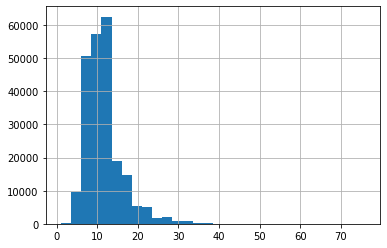

In [ ]:
seq_len = [len(i.split()) for i in df["title"]]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
input_ids = []
attention_masks = []

for t in title:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        t,                     
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 18,         # Pad & truncate all sentences.  
                        pad_to_max_length = True,
                        return_attention_mask = True,  # Construct attn. masks.
                        return_tensors = 'pt',     
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
    #Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Original: ', title[3])
print('Token IDs:', input_ids[3])

Original:  kessler topaz meltzer  check llp  deadline reminder for ideanomics inc investors
Token IDs: tensor([  101, 17710, 23385,  2327, 10936, 14899,  6290,  4638,  2222,  2361,
        15117, 14764,  2005,  2801,  3630, 22924,  4297,   102])


In [ ]:
print('Original: ', title[0])
print('Token IDs:', input_ids[0])

Original:  global marketsasia stocks rise as upbeat factory data lifts confidence
Token IDs: tensor([  101,  3795,  6089, 15396, 15768,  4125,  2004, 27999,  4713,  2951,
        13695,  7023,   102,     0,     0,     0,     0,     0])


Training & Validation Split

In [ ]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)


train_size = int(0.8 * len(dataset))
val_size=len(dataset) - train_size

train_dataset, val_dataset  = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

184,420 training samples
46,106 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# size of 16 or 32.
batch_size = 32


train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )


validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

BertForSequenceClassification

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
                    
    output_attentions = False, 
    output_hidden_states = False, 
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Optimizer & Learning Rate Scheduler

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr =  1e-3, 
                  eps = 1e-8 
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 2
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

Training Loop

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 64 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad()        


        output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = output.loss
        logits = output.logits


        total_train_loss += loss.item()

        loss.backward()


        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    

    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        


    print("")
    print("Running Validation...")

    t0 = time.time()


    model.eval()


    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0


    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        

        with torch.no_grad():        


            output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = output.loss
            logits = output.logits
            

        total_eval_loss += loss.item()


        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    64  of  5,764.    Elapsed: 0:00:07.
  Batch   128  of  5,764.    Elapsed: 0:00:13.
  Batch   192  of  5,764.    Elapsed: 0:00:19.
  Batch   256  of  5,764.    Elapsed: 0:00:25.
  Batch   320  of  5,764.    Elapsed: 0:00:31.
  Batch   384  of  5,764.    Elapsed: 0:00:37.
  Batch   448  of  5,764.    Elapsed: 0:00:43.
  Batch   512  of  5,764.    Elapsed: 0:00:49.
  Batch   576  of  5,764.    Elapsed: 0:00:55.
  Batch   640  of  5,764.    Elapsed: 0:01:02.
  Batch   704  of  5,764.    Elapsed: 0:01:08.
  Batch   768  of  5,764.    Elapsed: 0:01:14.
  Batch   832  of  5,764.    Elapsed: 0:01:20.
  Batch   896  of  5,764.    Elapsed: 0:01:26.
  Batch   960  of  5,764.    Elapsed: 0:01:32.
  Batch 1,024  of  5,764.    Elapsed: 0:01:38.
  Batch 1,088  of  5,764.    Elapsed: 0:01:44.
  Batch 1,152  of  5,764.    Elapsed: 0:01:50.
  Batch 1,216  of  5,764.    Elapsed: 0:01:56.
  Batch 1,280  of  5,764.    Elapsed: 0:02:02.
  Batch 1,344  of

Performance On Test Set

In [ ]:
df = test


print('Number of test sentences: {:,}\n'.format(df.shape[0]))

title = df.title.values
labels = df.lables.values

input_ids = []
attention_masks = []

for t in title:

    encoded_dict = tokenizer.encode_plus(
                        t,                      
                        add_special_tokens = True, 
                        max_length = 18,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
      
    input_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

batch_size = 32

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 69,158



In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    predictions.append(logits)
    true_labels.append(label_ids)
print('    DONE.')
  

Predicting labels for 69,158 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.lables.sum(), len(df.lables), (df.lables.sum() / len(df.lables) * 100.0)))

Positive samples: 2840 of 69158 (4.11%)


In [ ]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

matthews_set = []


print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
    matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = np.concatenate(true_labels, axis=0)
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.195


In [ ]:
import os


output_dir = './model_save/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)